In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population-data/world_population_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px


In [3]:
df = pd.read_csv('/kaggle/input/world-population-data/world_population_data.csv')
df.head()

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              234 non-null    int64  
 1   cca3              234 non-null    object 
 2   country           234 non-null    object 
 3   continent         234 non-null    object 
 4   2023 population   234 non-null    int64  
 5   2022 population   234 non-null    int64  
 6   2020 population   234 non-null    int64  
 7   2015 population   234 non-null    int64  
 8   2010 population   234 non-null    int64  
 9   2000 population   234 non-null    int64  
 10  1990 population   234 non-null    int64  
 11  1980 population   234 non-null    int64  
 12  1970 population   234 non-null    int64  
 13  area (km²)        234 non-null    float64
 14  density (km²)     234 non-null    int64  
 15  growth rate       234 non-null    object 
 16  world percentage  234 non-null    object 
dt

In [5]:
df.isnull().sum()


rank                0
cca3                0
country             0
continent           0
2023 population     0
2022 population     0
2020 population     0
2015 population     0
2010 population     0
2000 population     0
1990 population     0
1980 population     0
1970 population     0
area (km²)          0
density (km²)       0
growth rate         0
world percentage    0
dtype: int64

In [6]:
df['continent'].value_counts()


continent
Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: count, dtype: int64

In [7]:
df.describe()

,rank,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²)
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000
mean,117.500000,3.437442e+07,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814500e+05,451.282051
std,67.694165,1.373864e+08,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,1979.398922
min,1.000000,5.180000e+02,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,4.400000e-01,0.000000
25%,59.250000,4.225982e+05,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,39.500000
50%,117.500000,5.643895e+06,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,97.500000
75%,175.750000,2.324537e+07,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,242.750000
max,234.000000,1.428628e+09,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,21403.000000


**Global Population**

In [8]:
global_pop = df['2023 population'].sum()
print( f'{global_pop:,}')


8,043,615,390


**Visualization**

In [9]:
df.groupby('country').agg({'2023 population': 'sum'}).reset_index()


,country,2023 population
0,Afghanistan,42239854
1,Albania,2832439
2,Algeria,45606480
3,American Samoa,43914
4,Andorra,80088
...,...,...
229,Wallis and Futuna,11502
230,Western Sahara,587259
231,Yemen,34449825
232,Zambia,20569737


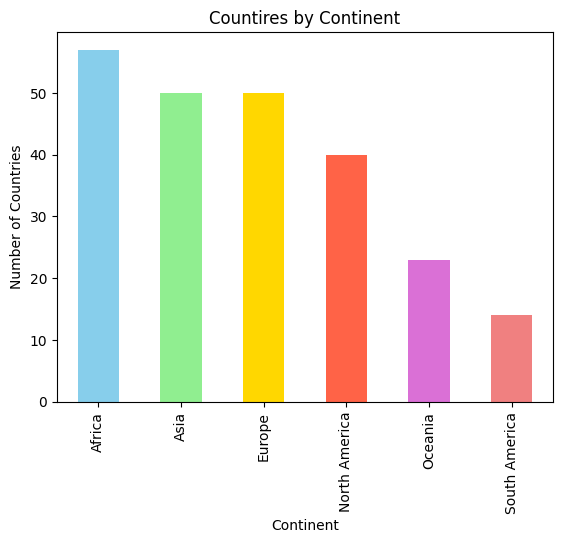

In [23]:
colors = ['skyblue', 'lightgreen', 'gold', 'tomato', 'orchid', 'lightcoral']

df.groupby('continent').size().plot(
    kind='bar',
    color=colors, 
    title='Countires by Continent'
)

# Show the plot
plt.ylabel('Number of Countries')
plt.xlabel('Continent')
plt.show()


<Axes: title={'center': 'Countries by Continent '}>

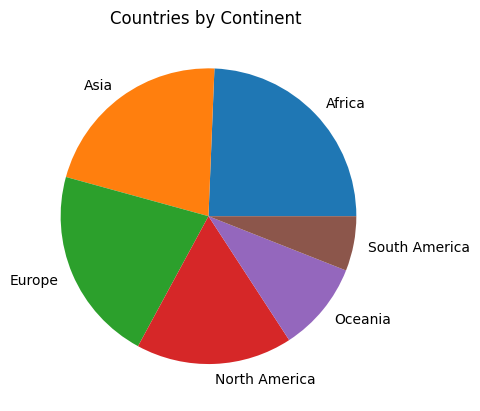

In [24]:
df.groupby('continent').size().plot(kind='pie', title='Countries by Continent ')


In [13]:
cols = df.columns[4:13]
df2 = df.groupby(['country','continent'])[cols].sum().stack().reset_index()
df2.columns=['country','continent', 'year', 'population']
df2['year'] = df2['year'].str[0:4]
df2['year'] = pd.to_datetime(df2['year'], format='%Y')
df2.head(5)

,country,continent,year,population
0,Afghanistan,Asia,2023-01-01,42239854
1,Afghanistan,Asia,2022-01-01,41128771
2,Afghanistan,Asia,2020-01-01,38972230
3,Afghanistan,Asia,2015-01-01,33753499
4,Afghanistan,Asia,2010-01-01,28189672


In [14]:
df_sorted = df.sort_values(by='area (km²)', ascending=False)
df_sorted.head(10)

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
8,9,RUS,Russia,Europe,144444359,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242.0,9,-0.19%,1.80%
37,38,CAN,Canada,North America,38781291,38454327,37888705,35732126,33963412,30683313,27657204,24511510,21434577,9984670.0,4,0.85%,0.48%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
6,7,BRA,Brazil,South America,216422446,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767.0,26,0.52%,2.70%
54,55,AUS,Australia,Oceania,26439111,26177413,25670051,23820236,22019168,19017963,17048003,14706322,12595034,7692024.0,3,1.00%,0.33%
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
32,33,ARG,Argentina,South America,45773884,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400.0,17,0.58%,0.57%
65,66,KAZ,Kazakhstan,Asia,19606633,19397998,18979243,17835909,16627837,15236253,16866563,14172710,12265305,2724900.0,7,1.08%,0.24%
33,34,DZA,Algeria,Africa,45606480,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741.0,19,1.57%,0.57%


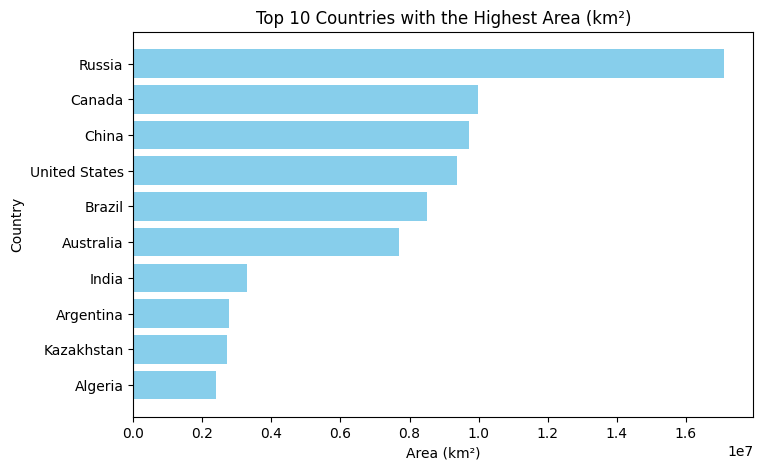

In [15]:
top_10 = df_sorted.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_10['country'], top_10['area (km²)'], color='skyblue')
plt.xlabel('Area (km²)')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Highest Area (km²)')
plt.gca().invert_yaxis()
plt.show()

In [16]:
df['density (km²)'].sort_values(ascending=False).head(10)


166    21403
216    18149
113     8377
103     7135
218     4807
153     1892
173     1737
172     1672
7       1329
212     1301
Name: density (km²), dtype: int64

In [17]:
df[df['density (km²)']==df['density (km²)'].sort_values(ascending=False).max()]


,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
166,167,MAC,Macau,Asia,704149,695168,676283,615239,557297,431896,350227,245332,247284,32.9,21403,1.29%,0.01%


In [18]:
density =df.sort_values(by='density (km²)', ascending=False)
top10_density = density.head(10)
top_10_densityCountry =df.sort_values(by='density (km²)', ascending=False).head(20)


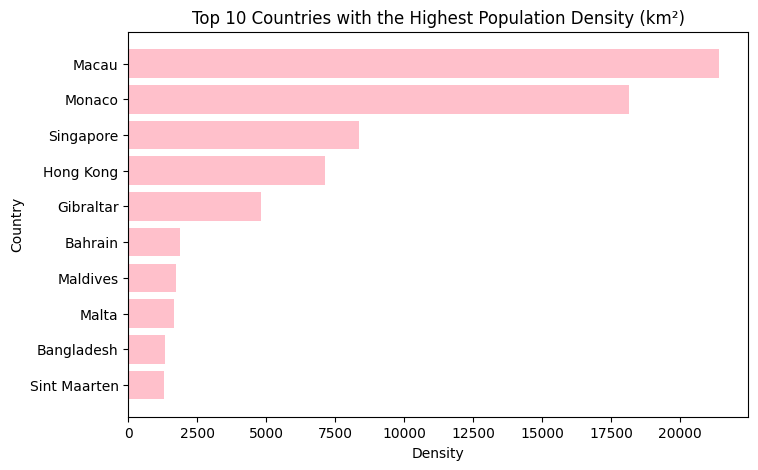

In [19]:
plt.figure(figsize=(8,5))
plt.barh(top10_density['country'] ,top10_density['density (km²)'], color='pink')
plt.xlabel('Density')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Highest Population Density (km²)')
plt.gca().invert_yaxis()
plt.show()

<Axes: ylabel='2023 population'>

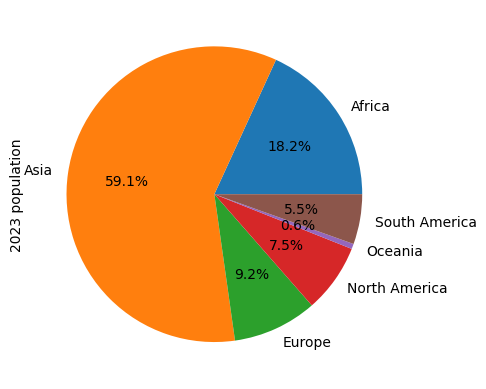

In [20]:
country_2023= df.groupby('continent')['2023 population'].sum()
country_2023.sort_values(ascending=False)
country_2023.plot(kind='pie', autopct='%1.1f%%')


In [21]:
top_5_countries = df.nlargest(5, '2023 population')
top_5_countries = top_5_countries.set_index('country').iloc[:, 3:12].transpose()
top_5_countries


country,India,China,United States,Indonesia,Pakistan
2023 population,1428627663,1425671352,339996563,277534122,240485658
2022 population,1417173173,1425887337,338289857,275501339,235824862
2020 population,1396387127,1424929781,335942003,271857970,227196741
2015 population,1322866505,1393715448,324607776,259091970,210969298
2010 population,1240613620,1348191368,311182845,244016173,194454498
2000 population,1059633675,1264099069,282398554,214072421,154369924
1990 population,870452165,1153704252,248083732,182159874,115414069
1980 population,696828385,982372466,223140018,148177096,80624057
1970 population,557501301,822534450,200328340,115228394,59290872


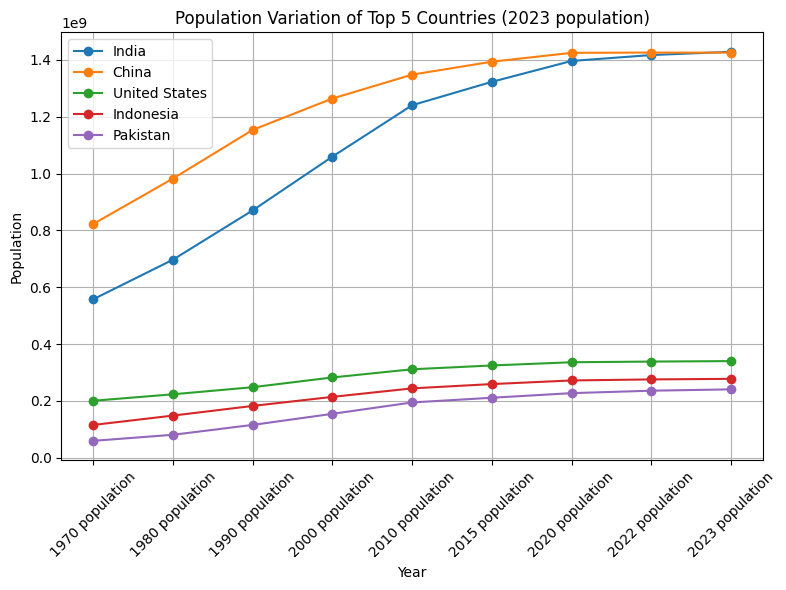

In [25]:
plt.figure(figsize=(8, 6))

for country in top_5_countries.columns:
    plt.plot(top_5_countries.index, top_5_countries[country], marker='o', label=country)

plt.title('Population Variation of Top 5 Countries (2023 population)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Reverse x-axis
plt.gca().invert_xaxis()

plt.show()
